In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
from sklearn import preprocessing
from sklearn import tree

/home/david/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
x = pd.read_csv("fb.csv", index_col = 0)
x

/home/david/anaconda2/lib/python2.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,PROV_CUENTA,PROV_TIPO_DOCUMENTO,PROV_NUM_DOCUMENTO,PROV_FEC_APER,ALTURA_MORA,MORA_MAXIMA,MES_1,MES_2,MES_3,MES_4,...,MES_27,MES_28,MES_29,MES_30,MES_31,MES_32,MES_33,MES_34,MES_35,MES_36
1,8228769611,1,79611181,20161006,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,8169086811,1,52249171,20140503,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8113372805,1,93377389,20110828,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8224958500,1,1113629973,20160814,0.0,20.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,8237356206,1,51652333,20170127,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,8258413707,1,79916841,20171106,0.0,0.0,0.0,0.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,8016988204,1,93291007,20060305,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8078689304,1,16820321,20100610,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,8070633607,1,65730414,20100114,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,8069487201,1,41365162,20091221,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#Quitamos, PROV_CUENTA, PROV_FEC_APER, PROV_NUM_DOCUMENTO ,PROV_TIPO_DOCUMENTO
#Estas columnas no nos son necesarias
col = pd.Categorical(x["PROV_TIPO_DOCUMENTO"])
print(col.describe())

             counts         freqs
categories                       
0                 1  8.037991e-07
1           1239763  9.965204e-01
3              4320  3.472412e-03
4                 2  1.607598e-06
6                 6  4.822794e-06


In [4]:
x.pop("PROV_CUENTA")
x.pop("PROV_FEC_APER")
x.pop("PROV_NUM_DOCUMENTO")
x.pop("PROV_TIPO_DOCUMENTO")



1          1
2          1
3          1
4          1
5          1
6          1
7          1
8          1
9          1
10         1
11         1
12         1
13         1
14         1
15         1
16         1
17         1
18         1
19         1
20         1
21         1
22         1
23         1
24         1
25         1
26         1
27         1
28         1
29         1
30         1
          ..
1244063    1
1244064    1
1244065    1
1244066    1
1244067    1
1244068    1
1244069    1
1244070    1
1244071    1
1244072    1
1244073    1
1244074    1
1244075    1
1244076    1
1244077    1
1244078    1
1244079    1
1244080    1
1244081    1
1244082    1
1244083    1
1244084    1
1244085    1
1244086    1
1244087    1
1244088    1
1244089    1
1244090    1
1244091    1
1244092    1
Name: PROV_TIPO_DOCUMENTO, Length: 1244092, dtype: int64

In [5]:
x.head()

,ALTURA_MORA,MORA_MAXIMA,MES_1,MES_2,MES_3,MES_4,MES_5,MES_6,MES_7,MES_8,...,MES_27,MES_28,MES_29,MES_30,MES_31,MES_32,MES_33,MES_34,MES_35,MES_36
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [6]:
headers = list(x)
headers

['ALTURA_MORA',
 'MORA_MAXIMA',
 'MES_1',
 'MES_2',
 'MES_3',
 'MES_4',
 'MES_5',
 'MES_6',
 'MES_7',
 'MES_8',
 'MES_9',
 'MES_10',
 'MES_11',
 'MES_12',
 'MES_13',
 'MES_14',
 'MES_15',
 'MES_16',
 'MES_17',
 'MES_18',
 'MES_19',
 'MES_20',
 'MES_21',
 'MES_22',
 'MES_23',
 'MES_24',
 'MES_25',
 'MES_26',
 'MES_27',
 'MES_28',
 'MES_29',
 'MES_30',
 'MES_31',
 'MES_32',
 'MES_33',
 'MES_34',
 'MES_35',
 'MES_36']

In [7]:
#Revisamos que todos las columnas tenga datos numericos y no nulos
for i in headers:
    head = pd.Categorical(x[i])
    print(head.describe())

             counts         freqs
categories                       
0.0         1070306  8.603110e-01
1.0           22124  1.778325e-02
2.0              32  2.572157e-05
6.0            6999  5.625790e-03
7.0               4  3.215196e-06
11.0           9471  7.612781e-03
12.0              9  7.234192e-06
16.0           5087  4.088926e-03
17.0              7  5.626594e-06
21.0           8834  7.100761e-03
22.0             35  2.813297e-05
26.0           7184  5.774493e-03
27.0             32  2.572157e-05
32.0           2348  1.887320e-03
33.0              1  8.037991e-07
37.0            861  6.920710e-04
38.0              1  8.037991e-07
42.0           1610  1.294117e-03
43.0              3  2.411397e-06
47.0           1059  8.512232e-04
52.0           2168  1.742636e-03
53.0              5  4.018995e-06
57.0           1710  1.374496e-03
58.0              8  6.430393e-06
62.0            600  4.822794e-04
67.0            335  2.692727e-04
72.0            575  4.621845e-04
77.0          

             counts         freqs
categories                       
-1.0          57880  4.652389e-02
 0.0        1012453  8.138088e-01
 1.0          25246  2.029271e-02
 6.0           7390  5.940075e-03
 11.0          9732  7.822573e-03
 16.0          5317  4.273800e-03
 21.0          8804  7.076647e-03
 26.0          7623  6.127360e-03
 32.0          2393  1.923491e-03
 37.0           950  7.636091e-04
 42.0          1589  1.277237e-03
 47.0          1236  9.934957e-04
 52.0          2683  2.156593e-03
 57.0          2300  1.848738e-03
 62.0           890  7.153812e-04
 67.0           407  3.271462e-04
 72.0           799  6.422355e-04
 77.0           575  4.621845e-04
 82.0          1417  1.138983e-03
 87.0          1362  1.094774e-03
 93.0           497  3.994881e-04
 98.0           248  1.993422e-04
 103.0          565  4.541465e-04
 108.0          430  3.456336e-04
 113.0         1085  8.721220e-04
 118.0         1086  8.729258e-04
 123.0          485  3.898426e-04
 128.0        

            counts         freqs
categories                      
-1.0        128477  1.032697e-01
 0.0        957626  7.697389e-01
 1.0         23037  1.851712e-02
 6.0          7265  5.839600e-03
 11.0         9635  7.744604e-03
 16.0         5537  4.450635e-03
 21.0         9795  7.873212e-03
 26.0         8291  6.664298e-03
 32.0         2378  1.911434e-03
 37.0         1020  8.198751e-04
 42.0         1614  1.297332e-03
 47.0         1106  8.890018e-04
 52.0         2477  1.991010e-03
 57.0         2232  1.794080e-03
 62.0          727  5.843619e-04
 67.0          423  3.400070e-04
 72.0          756  6.076721e-04
 77.0          567  4.557541e-04
 82.0         1277  1.026451e-03
 87.0         1313  1.055388e-03
 93.0          472  3.793932e-04
 98.0          308  2.475701e-04
 103.0         587  4.718301e-04
 108.0         441  3.544754e-04
 113.0        1132  9.099006e-04
 118.0        1113  8.946284e-04
 123.0         433  3.480450e-04
 128.0         230  1.848738e-04
 133.0    

            counts         freqs
categories                      
-1.0        207729  1.669724e-01
 0.0        906255  7.284469e-01
 5.0          7964  6.401456e-03
 10.0        10879  8.744530e-03
 15.0         6427  5.166017e-03
 20.0        10067  8.091845e-03
 25.0         9441  7.588667e-03
 31.0         2343  1.883301e-03
 36.0         1002  8.054067e-04
 41.0         1660  1.334306e-03
 46.0         1197  9.621475e-04
 51.0         2632  2.115599e-03
 56.0         2473  1.987795e-03
 61.0          926  7.443179e-04
 66.0          450  3.617096e-04
 71.0          809  6.502735e-04
 76.0          587  4.718301e-04
 81.0         1381  1.110047e-03
 86.0         1308  1.051369e-03
 92.0          470  3.777856e-04
 97.0          224  1.800510e-04
 102.0         476  3.826084e-04
 107.0         351  2.821335e-04
 112.0         816  6.559000e-04
 117.0         917  7.370838e-04
 122.0         365  2.933867e-04
 126.0         199  1.599560e-04
 131.0         375  3.014247e-04
 136.0    

            counts         freqs
categories                      
-1.0        282022  2.266890e-01
 0.0        843396  6.779209e-01
 5.0          7635  6.137006e-03
 10.0        11576  9.304778e-03
 15.0         6615  5.317131e-03
 20.0         8435  6.780045e-03
 25.0         8160  6.559000e-03
 31.0         2491  2.002263e-03
 36.0          953  7.660205e-04
 41.0         1738  1.397003e-03
 46.0         1203  9.669703e-04
 51.0         2278  1.831054e-03
 56.0         2628  2.112384e-03
 61.0          810  6.510773e-04
 66.0          406  3.263424e-04
 71.0          743  5.972227e-04
 76.0          539  4.332477e-04
 81.0          946  7.603939e-04
 86.0         1120  9.002550e-04
 92.0          444  3.568868e-04
 97.0          217  1.744244e-04
 102.0         422  3.392032e-04
 107.0         328  2.636461e-04
 112.0         647  5.200580e-04
 117.0         798  6.414317e-04
 123.0         279  2.242599e-04
 128.0         147  1.181585e-04
 133.0         346  2.781145e-04
 138.0    

            counts         freqs
categories                      
-1.0        359465  2.889376e-01
 0.0        776790  6.243831e-01
 5.0          7253  5.829955e-03
 10.0         9779  7.860351e-03
 15.0         5780  4.645959e-03
 20.0         6900  5.546214e-03
 25.0         8392  6.745482e-03
 31.0         2279  1.831858e-03
 36.0          979  7.869193e-04
 41.0         1762  1.416294e-03
 46.0         1343  1.079502e-03
 51.0         2026  1.628497e-03
 56.0         2565  2.061745e-03
 61.0          809  6.502735e-04
 64.0          394  3.166968e-04
 69.0          755  6.068683e-04
 74.0          600  4.822794e-04
 79.0         1002  8.054067e-04
 84.0         1307  1.050565e-03
 90.0          502  4.035071e-04
 95.0          233  1.872852e-04
 100.0         479  3.850198e-04
 105.0         388  3.118740e-04
 110.0         630  5.063934e-04
 115.0         860  6.912672e-04
 121.0         354  2.845449e-04
 126.0         170  1.366458e-04
 131.0         342  2.748993e-04
 136.0    

In [8]:
#Removemos los datos nulos
for i in headers:
    x.dropna(subset=[i], how='all', inplace = True)

In [9]:
for i in headers:
    head = pd.Categorical(x[i])
    print(head.describe())

             counts         freqs
categories                       
0.0         1070306  8.603110e-01
1.0           22124  1.778325e-02
2.0              32  2.572157e-05
6.0            6999  5.625790e-03
7.0               4  3.215196e-06
11.0           9471  7.612781e-03
12.0              9  7.234192e-06
16.0           5087  4.088926e-03
17.0              7  5.626594e-06
21.0           8834  7.100761e-03
22.0             35  2.813297e-05
26.0           7184  5.774493e-03
27.0             32  2.572157e-05
32.0           2348  1.887320e-03
33.0              1  8.037991e-07
37.0            861  6.920710e-04
38.0              1  8.037991e-07
42.0           1610  1.294117e-03
43.0              3  2.411397e-06
47.0           1059  8.512232e-04
52.0           2168  1.742636e-03
53.0              5  4.018995e-06
57.0           1710  1.374496e-03
58.0              8  6.430393e-06
62.0            600  4.822794e-04
67.0            335  2.692727e-04
72.0            575  4.621845e-04
77.0          

             counts         freqs
categories                       
-1.0          68324  5.491877e-02
 0.0        1007120  8.095221e-01
 1.0          23843  1.916498e-02
 6.0           6828  5.488340e-03
 11.0          9185  7.382895e-03
 16.0          5198  4.178148e-03
 21.0          8921  7.170692e-03
 26.0          6924  5.565505e-03
 31.0          2248  1.806940e-03
 36.0           934  7.507483e-04
 41.0          1550  1.245889e-03
 46.0          1129  9.074892e-04
 51.0          2517  2.023162e-03
 56.0          2315  1.860795e-03
 62.0           797  6.406279e-04
 67.0           383  3.078550e-04
 72.0           743  5.972227e-04
 77.0           626  5.031782e-04
 82.0          1465  1.177566e-03
 87.0          1415  1.137376e-03
 92.0           587  4.718301e-04
 97.0           328  2.636461e-04
 102.0          613  4.927288e-04
 107.0          477  3.834122e-04
 112.0         1191  9.573247e-04
 117.0         1289  1.036097e-03
 123.0          504  4.051147e-04
 128.0        

            counts         freqs
categories                      
-1.0        137198  1.102796e-01
 0.0        958780  7.706665e-01
 1.0         21410  1.720934e-02
 6.0          5898  4.740807e-03
 11.0         7389  5.939271e-03
 16.0         4470  3.592982e-03
 21.0         8792  7.067001e-03
 26.0         7582  6.094405e-03
 31.0         1978  1.589915e-03
 36.0          909  7.306534e-04
 41.0         1528  1.228205e-03
 46.0         1054  8.472042e-04
 51.0         2305  1.852757e-03
 56.0         2155  1.732187e-03
 62.0          776  6.237481e-04
 67.0          470  3.777856e-04
 72.0          922  7.411027e-04
 77.0          622  4.999630e-04
 82.0         1562  1.255534e-03
 87.0         1487  1.195249e-03
 92.0          548  4.404819e-04
 97.0          273  2.194371e-04
 102.0         624  5.015706e-04
 107.0         459  3.689438e-04
 112.0        1075  8.640840e-04
 117.0        1159  9.316031e-04
 123.0         432  3.472412e-04
 128.0         240  1.929118e-04
 133.0    

            counts         freqs
categories                      
-1.0        207729  1.669724e-01
 0.0        906255  7.284469e-01
 5.0          7964  6.401456e-03
 10.0        10879  8.744530e-03
 15.0         6427  5.166017e-03
 20.0        10067  8.091845e-03
 25.0         9441  7.588667e-03
 31.0         2343  1.883301e-03
 36.0         1002  8.054067e-04
 41.0         1660  1.334306e-03
 46.0         1197  9.621475e-04
 51.0         2632  2.115599e-03
 56.0         2473  1.987795e-03
 61.0          926  7.443179e-04
 66.0          450  3.617096e-04
 71.0          809  6.502735e-04
 76.0          587  4.718301e-04
 81.0         1381  1.110047e-03
 86.0         1308  1.051369e-03
 92.0          470  3.777856e-04
 97.0          224  1.800510e-04
 102.0         476  3.826084e-04
 107.0         351  2.821335e-04
 112.0         816  6.559000e-04
 117.0         917  7.370838e-04
 122.0         365  2.933867e-04
 126.0         199  1.599560e-04
 131.0         375  3.014247e-04
 136.0    

            counts         freqs
categories                      
-1.0        271419  2.181663e-01
 0.0        841215  6.761678e-01
 1.0         21448  1.723988e-02
 6.0          7111  5.715815e-03
 11.0         9835  7.905364e-03
 16.0         5676  4.562364e-03
 21.0         7211  5.796195e-03
 26.0         6691  5.378220e-03
 31.0         1796  1.443623e-03
 36.0          710  5.706973e-04
 41.0         1277  1.026451e-03
 46.0          867  6.968938e-04
 51.0         1712  1.376104e-03
 56.0         1773  1.425136e-03
 62.0          645  5.184504e-04
 67.0          327  2.628423e-04
 72.0          640  5.144314e-04
 77.0          484  3.890388e-04
 82.0         1019  8.190713e-04
 87.0         1120  9.002550e-04
 92.0          380  3.054436e-04
 97.0          211  1.696016e-04
 102.0         421  3.383994e-04
 107.0         317  2.548043e-04
 112.0         634  5.096086e-04
 117.0         732  5.883809e-04
 123.0         297  2.387283e-04
 128.0         152  1.221775e-04
 133.0    

            counts         freqs
categories                      
-1.0        339217  2.726623e-01
 0.0        793791  6.380485e-01
 5.0          8546  6.869267e-03
 10.0        10296  8.275915e-03
 15.0         5924  4.761706e-03
 20.0         7547  6.066272e-03
 25.0         8459  6.799336e-03
 31.0         2173  1.746655e-03
 36.0          837  6.727798e-04
 41.0         1515  1.217756e-03
 46.0         1138  9.147233e-04
 51.0         1755  1.410667e-03
 56.0         2198  1.766750e-03
 61.0          690  5.546214e-04
 66.0          390  3.134816e-04
 71.0          653  5.248808e-04
 76.0          534  4.292287e-04
 81.0          978  7.861155e-04
 86.0         1238  9.951033e-04
 92.0          398  3.199120e-04
 97.0          188  1.511142e-04
 102.0         439  3.528678e-04
 107.0         374  3.006209e-04
 112.0         647  5.200580e-04
 117.0         854  6.864444e-04
 122.0         287  2.306903e-04
 125.0         182  1.462914e-04
 130.0         383  3.078550e-04
 135.0    

In [10]:
#Removemos altura mora y mora maxima
mora = x[["ALTURA_MORA", "MORA_MAXIMA"]].copy()

x.pop("ALTURA_MORA")
x.pop("MORA_MAXIMA")

1            0.0
2            0.0
3            0.0
4           20.0
5            0.0
6            0.0
7            0.0
8            0.0
9            0.0
10           0.0
11          21.0
12           0.0
13           0.0
14           0.0
15          20.0
16           0.0
17          16.0
18           0.0
19           0.0
20           0.0
21           0.0
22           0.0
23           0.0
24          21.0
25           0.0
26           0.0
27          51.0
28           0.0
29           0.0
30           0.0
           ...  
1244063      0.0
1244064      5.0
1244065      0.0
1244066      0.0
1244067      0.0
1244068      0.0
1244069      0.0
1244070      1.0
1244071      0.0
1244072      0.0
1244073      6.0
1244074      0.0
1244075      0.0
1244076      0.0
1244077      0.0
1244078      0.0
1244079    482.0
1244080    493.0
1244081    498.0
1244082    503.0
1244083    818.0
1244084      0.0
1244085      0.0
1244086      0.0
1244087     11.0
1244088      0.0
1244089      0.0
1244090      0

In [11]:
x

,MES_1,MES_2,MES_3,MES_4,MES_5,MES_6,MES_7,MES_8,MES_9,MES_10,...,MES_27,MES_28,MES_29,MES_30,MES_31,MES_32,MES_33,MES_34,MES_35,MES_36
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
mora

,ALTURA_MORA,MORA_MAXIMA
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,20.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0
10,0.0,0.0


In [13]:
#En los datos podemos observar que existe gran cantidad de filas con una cantidad muy alta
print(x.iloc[4000:5000,0:36].T.plot().get_legend().remove())

None


In [14]:
from sklearn.cluster import KMeans

In [15]:
#Creamos 3 clusters para para poder tener tres tipos de datos
kmeans = KMeans(n_clusters=3, random_state=0).fit(x)

In [16]:
result = kmeans.predict(x)

In [17]:
x["resultado"] = result + 1

In [18]:
x.head()

,MES_1,MES_2,MES_3,MES_4,MES_5,MES_6,MES_7,MES_8,MES_9,MES_10,...,MES_28,MES_29,MES_30,MES_31,MES_32,MES_33,MES_34,MES_35,MES_36,resultado
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1


/home/david/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/david/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/david/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


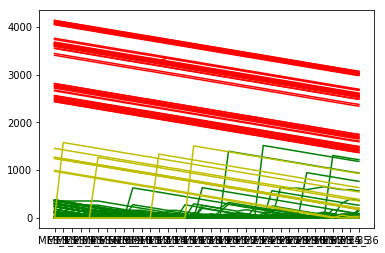

In [19]:
#Podemos ver que el cluster 1 tiene cantidades menos grandes que el cluster 2 o 3
import matplotlib.pyplot as plt
plt.plot(x.iloc[4000:5000,0:36][(x.iloc[:,36] == 1)].T, color="g")
plt.plot(x.iloc[4000:5000,0:36][(x.iloc[:,36] == 2)].T, color="r")
plt.plot(x.iloc[4000:5000,0:36][(x.iloc[:,36] == 3)].T, color="y")